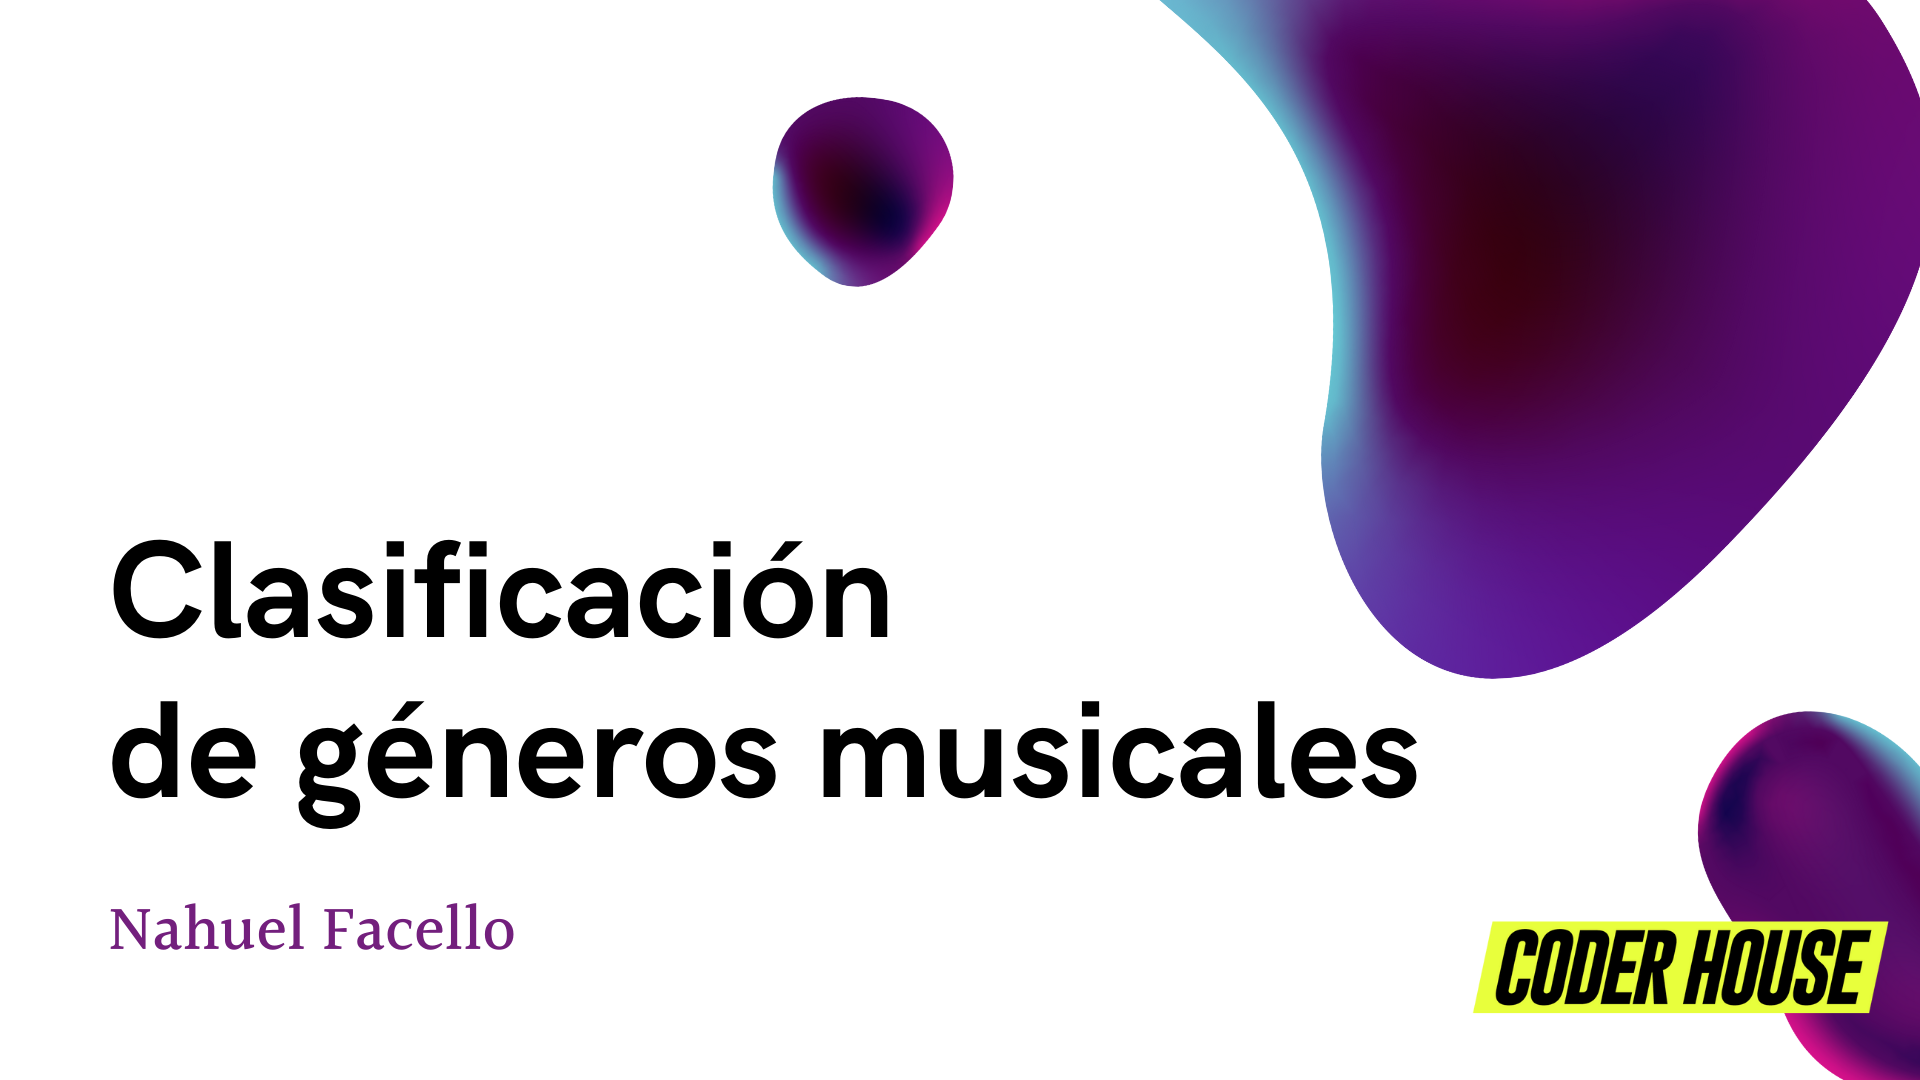


## *Abstract*
-------

La música desempeña un papel fundamental en nuestras vidas ya que tiene el poder de evocar emociones, conectar culturas, contar historias y sanar el alma.

Este estudio pretende analizar un dataset de canciones de música con su género y características musicales para luego de un análisis profundo, poder predecir el tipo de género de música.

En principio, exploraremos el dataset en investigaremos cuáles son las características más importantes que influyen en la predicción de los distintos géneros musicales. Luego, se examinanaremos si los géneros entre si tienen diferencias significativas que permitan describir y agrupar los mismos. Esta última pregunta nos hace plantearnos, ¿será más fácil predecir un género que otro ? Con estas tres preguntas bases, pretendemos explorar y comprender (de ser posible) la relación entre las **características musicales** y el **género de la música**.

## *Enfoque comercial*
------

Hoy en dia gracias a la globalizacion y plataformas de streaming, la cantidad de musica disponible y la diversidad de gustos musicales se ha expandido creando la necesidad de ofrecer recomendaciones personalizadas a los oyentes.

Ademas de investigar y comprender la relacion entre las distintas caracteristicas de las variables con el resultado en forma academica, el proyecto busca desarollar un modelo predictivo que pueda recomendar de forma precisa, distintos generos de musica en funcion al historial de un usuario particular.

El objetivo final sera construir un modelo de aprendizaje automatica que pueda integrearse en sistemas de recomendacion y mejorar la experiencia de usuario al recomerdarles musica adaptada a sus preferencias individuales.

Siendo que el target de este estudio son las plataformas de streaming, este tambiéen puede tener aplicaciones en la industria musical en general ya que productoras y distinto artistas pueden utilizar estos resultados para comprender mejor las preferencias de su audiencia y ajustar su estrategia de marketing y producción en consecuencia.





#**1. Introducción**
-----
##`music_genre.csv`
El dataset utilizado en este análisis proviene de Kaggle, una conocida plataforma en línea que contiene una amplia variedad de datasets y competiciones relacionadas con el aprendizaje automático y la ciencia de datos.

El conjunto de datos `music_genre.csv` se ha vuelto conocido debido a su relevancia en la clasificación de distintos géneros de música. Este contiene información detallada y variada sobre distintas canciones junto con sus respectivas características musicales, recopiladas para su análisis y clasificación.

El dataset como tal, proviene de [Spotify for Developers](https://developer.spotify.com/).


### *Variables:*
* `instance_id`: Identificador único para cada instancia
en el conjunto de datos.

* `artist_name`: Nombre del artista o banda que interpreta la canción.

* `track_name`: Nombre de la canción.

* `popularity`: Popularidad de la canción, representada como un valor numérico que va de 0 a 100. Mientas más alto es el valor, más popular es la canción.

* `acousticness`: Valor numérico que indica qué tan acústica es una canción. Un valor cercano a 1.0 indica una canción altamente acústica, mientras que un valor cercano a 0.0 indica una canción electrónica o con poca presencia acústica.

* `danceability`: Valor numérico que representa la capacidad de una canción para ser bailada basándose en una combinación de elementos musicales, incluyendo el tempo, la estabilidad del ritmo, la fuerza del beat y la regularidad general. Cuanto mayor sea el valor, más adecuada será la canción para bailar.

* `duration_ms`: Duración de la canción en milisegundos.

* `energy`: Valor numérico entre 0 y 1 que representa la energía y la intensidad de una canción. Cuanto mayor sea el valor, más enérgica es la canción.

* `instrumentalness`: Valor numérico que indica la probabilidad de que una canción sea instrumental (sin voces). Un valor cercano a 1.0 indica alta instrumentalidad, mientras que un valor cercano a 0.0 indica que la canción es más cantada.

* `key`: Tonalidad de la canción representada según el sistema de notación anglosajón (A - G).

* `liveness`: Valor numérico que indica la presencia de audiencia en la grabación, es decir, la probabilidad de que una canción haya sido interpretada en vivo. Un valor cercano a 1.0 indica alta probabilidad de interpretación en vivo.

* `loudness`: Intensidad del sonido de una canción medida en decibeles (dB). Cuanto mayor sea el valor, más alta es la intensidad de la canción.

* `mode`: Indica el modo de la canción (mayor o menor).

* `speechiness`: Indica la presencia de elementos hablados en una canción. Cuanto mayor sea el valor, más hablada es la canción.

* `tempo`: Ritmo o velocidad de la canción, expresado en BPM (beats per minute).

* `obtained_date`: La fecha en la que se obtuvieron los datos para esta instancia en el conjunto de datos.

* `valence`: Valor numerico entre 0 y 1 que epresenta la positividad o felicidad de una canción. Cuanto mayor sea el valor, más positiva es la canción (alegre, euforica, felíz, etc.).

* `music_genre`: Etiqueta o categoría de género asignada a la canción. Esta es la variable objetivo que se intenta predecir mediante técnicas de ML.

# **2. Preparación y pre-procesamiento de datos**
----
Se realizará la instalación de librerías y se cargará el dataset.

Para esta actividad, realizaremos la instalación de la librería de Kaggle, para que junto con una API, podamos acceder a través de este al dataset.

In [ ]:
! pip install kaggle #Instalo la libreria
! mkdir ~/.kaggle #Creo un directorio que se llame kaggle
! cp kaggle.json ~/.kaggle/ #copio el archivo JSON a al directorio
! chmod 600 ~/.kaggle/kaggle.json # abro permisos con la API

mkdir: cannot create directory ‘/root/.kaggle’: File exists


### **2.1 Preparación y configuración de librerias**

In [ ]:
#Importacion de librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

A continuación realizamos la descarga del archivo, lo leeremos con pandas y guardaremos el dataframe como `df`.

In [ ]:
! kaggle datasets download vicsuperman/prediction-of-music-genre
! unzip prediction-of-music-genre.zip

# Lectura del csv con pandas
df = pd.read_csv('music_genre.csv')
df.head()

prediction-of-music-genre.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  prediction-of-music-genre.zip
replace music_genre.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: music_genre.csv         


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


Buscamos conocer todos los géneros de música que pretendemos predecir.

In [ ]:
list(df['music_genre'].unique())

['Electronic',
 'Anime',
 nan,
 'Jazz',
 'Alternative',
 'Country',
 'Rap',
 'Blues',
 'Rock',
 'Classical',
 'Hip-Hop']

### **2.2 Data Wrangling**

Notamos que hay valores nulos en la lista como `nan`. Veremos cuales son:

In [ ]:
df_nan = df[df['music_genre'].isnull()]
df_nan

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ya que los registros son completamente nulos y no tienen relevancia para el análisis, procederemos a borrarlas.

In [ ]:
df.dropna(inplace = True)

También observamos que hay atributos que consideramos no ser pertinentes para el análisis tales como:
* `instance_id`
* `track_name`
* `obtained_date`

In [ ]:
df.drop(['instance_id','track_name','obtained_date'], axis = 1, inplace = True)
df

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Röyksopp,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,Thievery Corporation,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,Dillon Francis,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,Dubloadz,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,What So Not,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,BEXEY,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,0.330,Hip-Hop
50001,Roy Woods,72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,0.113,Hip-Hop
50002,Berner,51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop
50003,The-Dream,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,0.354,Hip-Hop


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       50000 non-null  object 
 1   popularity        50000 non-null  float64
 2   acousticness      50000 non-null  float64
 3   danceability      50000 non-null  float64
 4   duration_ms       50000 non-null  float64
 5   energy            50000 non-null  float64
 6   instrumentalness  50000 non-null  float64
 7   key               50000 non-null  object 
 8   liveness          50000 non-null  float64
 9   loudness          50000 non-null  float64
 10  mode              50000 non-null  object 
 11  speechiness       50000 non-null  float64
 12  tempo             50000 non-null  object 
 13  valence           50000 non-null  float64
 14  music_genre       50000 non-null  object 
dtypes: float64(10), object(5)
memory usage: 6.1+ MB


# **3. Exploratory Data Analysis (EDA)**
-----

A continuación vamos a explorar las variables numericas con el método `describe`:

In [ ]:
df.describe().round(2)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,44.22,0.31,0.56,221252.60,0.60,0.18,0.19,-9.13,0.09,0.46
std,15.54,0.34,0.18,128671.96,0.26,0.33,0.16,6.16,0.10,0.25
min,0.00,0.00,0.06,-1.00,0.00,0.00,0.01,-47.05,0.02,0.00
25%,34.00,0.02,0.44,174800.00,0.43,0.00,0.10,-10.86,0.04,0.26
50%,45.00,0.14,0.57,219281.00,0.64,0.00,0.13,-7.28,0.05,0.45
75%,56.00,0.55,0.69,268612.25,0.82,0.16,0.24,-5.17,0.10,0.65
max,99.00,1.00,0.99,4830606.00,1.00,1.00,1.00,3.74,0.94,0.99


A simple vista notamos que la el atributo `duration_ms` tiene como valor mínimo como -1. Dado que la duración negativa no existe, observemos estos registros y la cantidad:

In [ ]:
df_duracion_negativa = df[df['duration_ms'] < 0]
print('Cantidad de registros con duracion negativa: ',df_duracion_negativa.popularity.count(),end = '\n \n')
print('% de registros con duracion negativa sobre el total: ','{:.1%}'.format(df_duracion_negativa.popularity.count()/df.popularity.count()),end = '\n \n')
df_duracion_negativa

Cantidad de registros con duracion negativa:  4939
 
% de registros con duracion negativa sobre el total:  9.9%
 


,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Röyksopp,27.0,0.00468,0.652,-1.0,0.941,0.792000,A#,0.1150,-5.201,Minor,0.0748,100.889,0.7590,Electronic
13,DJ Shadow,31.0,0.86000,0.737,-1.0,0.405,0.036100,A,0.1730,-10.536,Minor,0.0424,154.745,0.6470,Electronic
16,San Holo,59.0,0.13600,0.336,-1.0,0.746,0.000000,C#,0.7370,-4.315,Minor,0.0685,151.756,0.2100,Electronic
24,The Prodigy,56.0,0.06800,0.725,-1.0,0.877,0.000036,C,0.0900,-3.496,Major,0.0646,105.919,0.0977,Electronic
35,Fabian Mazur,33.0,0.10800,0.493,-1.0,0.682,0.000000,A,0.1960,-5.781,Minor,0.2870,?,0.2390,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49956,empty_field,52.0,0.13300,0.867,-1.0,0.618,0.000002,B,0.1280,-4.956,Minor,0.0614,140.005,0.8570,Hip-Hop
49969,Bone Thugs-N-Harmony,47.0,0.01270,0.706,-1.0,0.787,0.000000,A,0.2650,-5.314,Major,0.0888,85.963,0.2430,Hip-Hop
49979,Young Dolph,47.0,0.48300,0.789,-1.0,0.452,0.000000,B,0.0892,-7.538,Minor,0.4800,140.101,0.2840,Hip-Hop
49981,Mac Miller,60.0,0.06350,0.594,-1.0,0.823,0.000000,A,0.0950,-5.210,Major,0.3320,97.101,0.6630,Hip-Hop


Los registros con duración negativa representan el 10% de nuestros dataset. Considerando que, por lo general, las obras de música clásica son mas extensas que aquellas de otros géneros, intuimos que el parámetro de duración es importante.

Graficaremos la distribución de la duración, con y sin los negativos.

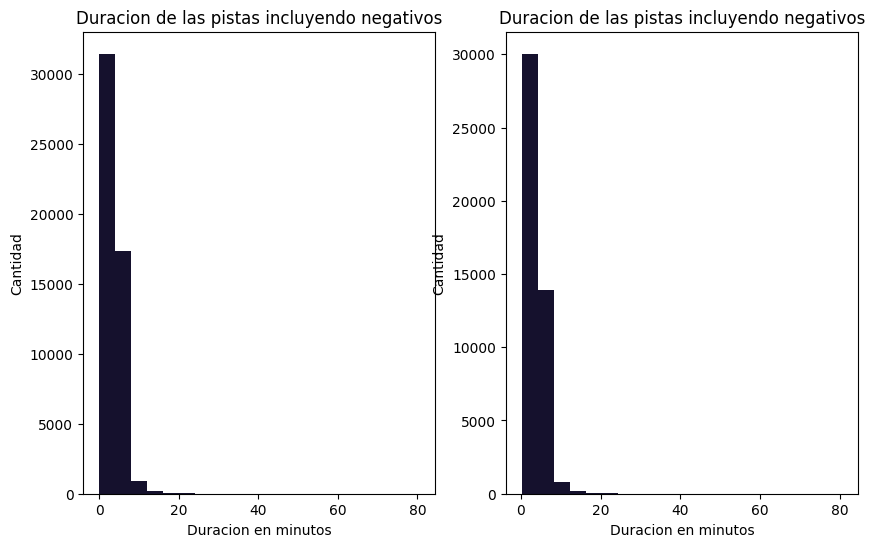

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize = (10,6))
ax[0].hist(df.duration_ms*1.6667e-5, bins = 20, color = '#15112D') #Realizamos la conversión de ms a minutos
ax[0].set_title("Duracion de las pistas incluyendo negativos")
ax[0].set_xlabel("Duracion en minutos")
ax[0].set_ylabel("Cantidad")
ax[1].hist(df[df['duration_ms'] >= 0]['duration_ms'] *1.6667e-5, bins = 20, color = '#15112D')
ax[1].set_title("Duracion de las pistas incluyendo negativos")
ax[1].set_xlabel("Duracion en minutos")
ax[1].set_ylabel("Cantidad")
fig.show()

Notamos que la distribución de la duración parece no estar afectada por la cantidad de datos. Tendremos en cuenta esta situación luego de realizado el en la evualacion del despeño del modelo para ver si esta estos registros pueden influir.

A continuación, graficamos la distribución de la duracion por género.

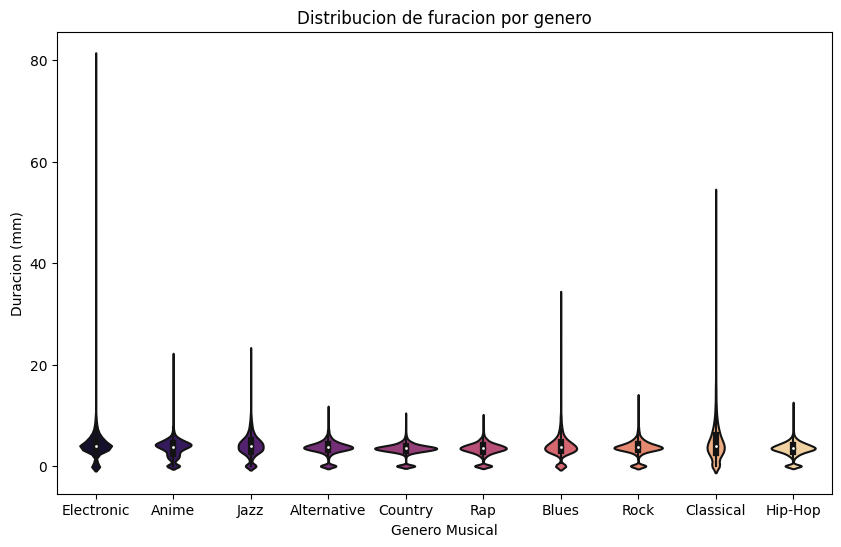

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.violinplot(x='music_genre', y= df.duration_ms*1.6667e-5, data= df, palette = 'magma')
plt.xlabel('Genero Musical')
plt.ylabel('Duracion (mm)')
plt.title('Distribucion de furacion por genero')
plt.show()

Notamos efectivamente que las canciones del género clásico son mas extensas que el resto, sin embargo **aun mas extensas son las del género electrónica**.


> Podemos suponer entonces, que una canción con una duración mayor a 60 minutos puede estar relacionada a el género *electrónica*.



Así también, otro factor importante a tener en cuenta es que la distribucion de los géneros *clasico, blues, y jazz* tienen mayor distribución en variable `duration_ms` que el resto de los géneros.


A continuación, validaremos la cantidad de registros que tenemos por género:

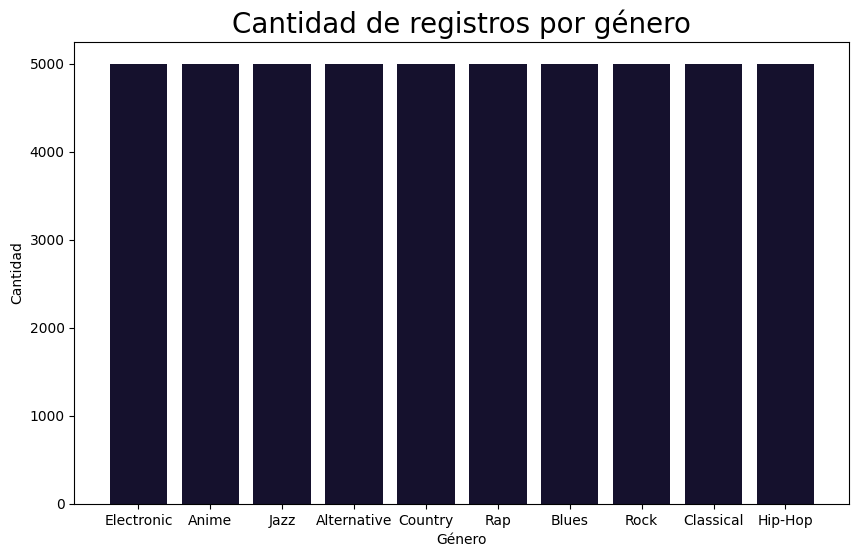

In [ ]:
cantidad_genero = df.music_genre.value_counts()
fig, ax = plt.subplots(figsize = (10,6))
ax.bar(cantidad_genero.index, cantidad_genero.values, color = '#15112D')
ax.set_title("Cantidad de registros por género",size = 20)
ax.set_xlabel("Género")
ax.set_ylabel("Cantidad")
fig.show()

Exploraremos una variable que puede influir, `danceability`, que indica la danzabilidad de las pistas:

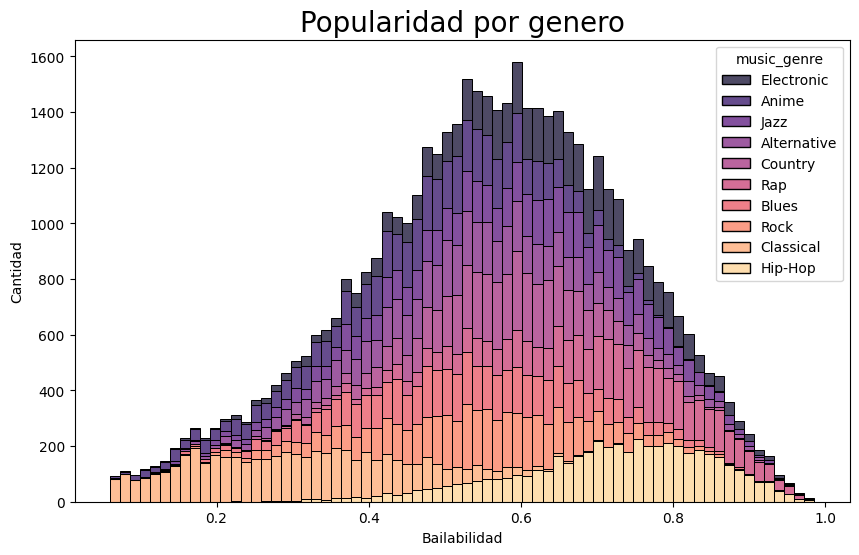

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(data = df, x = 'danceability', hue = 'music_genre', palette = "magma",ax = ax, multiple = 'stack' )
ax.set_title("Popularidad por genero",size = 20)
ax.set_xlabel("Bailabilidad")
ax.set_ylabel("Cantidad")
fig.show()

Aqui podemos notar que parece haber una relación entre el *Hip-Hop* y las canciones mas bailabes y la *música clásic*a con las que son menos bailables, con lo cual el atributo `danceability` podria definir el tipo de género de una canción de *hip-hop* o *música clásica*. Evaluaremos lo mismo con `instrumentalness`.

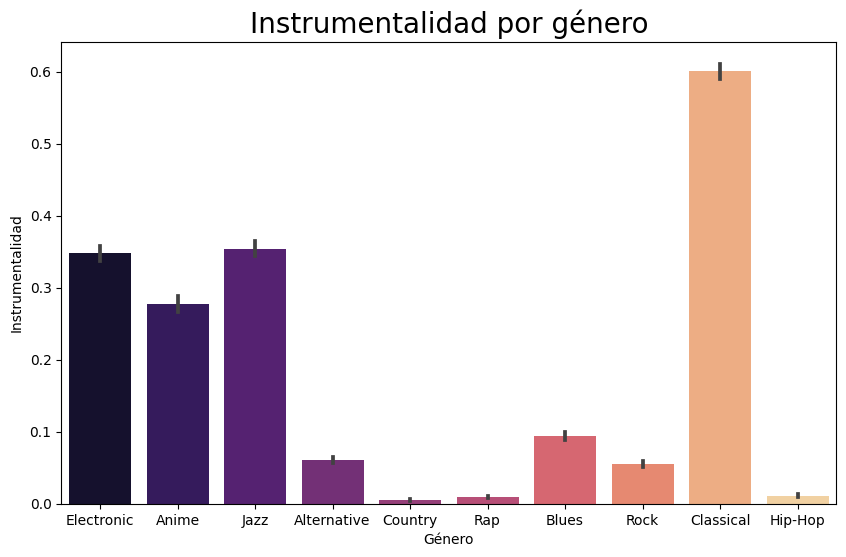

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(data = df, x='music_genre',y= 'instrumentalness', ax = ax, palette = "magma")
ax.set_title("Instrumentalidad por género",size = 20)
ax.set_xlabel("Género")
ax.set_ylabel("Instrumentalidad")
fig.show()

A diferencia del caso anterior, la *música clásica* es mucho más instrumental que otros géneros como el *country, rap o hip-hop*. Con lo cual esta variable podría ser decisiva al momento de definir si se trata de *música clásica*.

<ipython-input-33-7e4ebd40574d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df.iloc[:,1:].corr() # Creo una matriz de correlacion


Text(0.5, 1.0, 'Mapa de Calor')

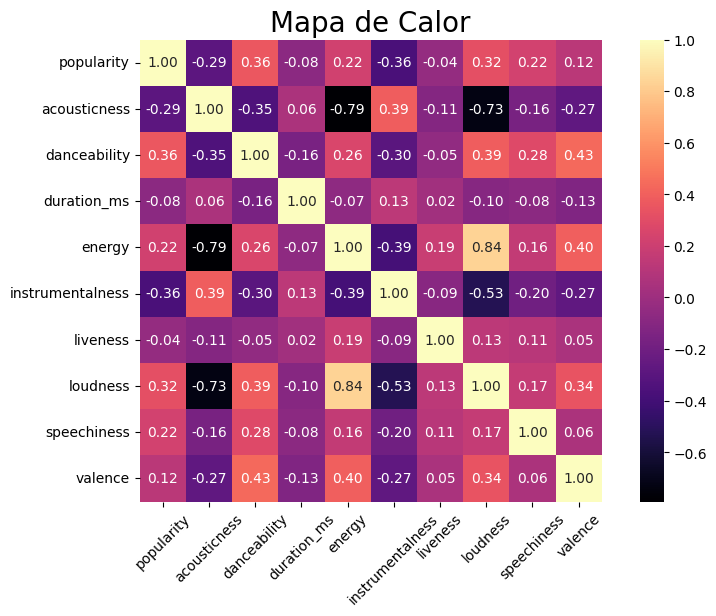

In [ ]:
correlacion = df.iloc[:,1:].corr() # Creo una matriz de correlacion

fig, ax = plt.subplots(figsize = (10,6))
ax = sns.heatmap(correlacion,  cmap = "magma",square=True, annot=True, fmt=".2f")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
ax.set_title("Mapa de Calor",size = 20)

Creamos un mapa de calor con las variables numéricas para encontrar mas relaciones.
Notamos que hay una relación fuerte entre `energy` y `loudness` y, de forma opuesta entre `energy`, el `loudness` y `acousticness`.

Inspeccionemos los artistas en función a los géneros:

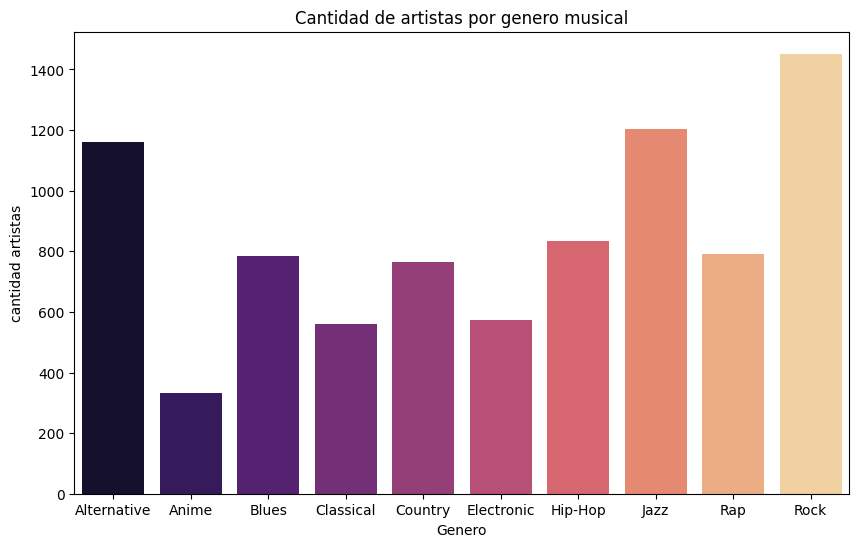

In [ ]:
artist_genre_counts = df.groupby('music_genre')['artist_name'].nunique()

plt.figure(figsize=(10, 6))
sns.barplot(x=artist_genre_counts.index, y=artist_genre_counts.values, palette = 'magma')
plt.xlabel('Genero')
plt.ylabel('cantidad artistas')
plt.title('Cantidad de artistas por genero musical')
plt.show()

In [ ]:
df_artistas_genero = df.pivot_table(index='artist_name', columns='music_genre', aggfunc='size', fill_value=0)

df_artistas_genero

music_genre,Alternative,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
artist_name,,,,,,,,,,
!!!,1,0,0,0,0,21,0,0,0,0
"""Weird Al"" Yankovic",0,0,0,0,0,0,0,0,0,1
$NOT,0,0,0,0,0,0,3,0,0,0
$tupid Young,0,0,0,0,0,0,0,0,1,0
$uicideBoy$,0,0,0,0,0,0,51,0,41,0
...,...,...,...,...,...,...,...,...,...,...
棗坂シキ(CV.平川大輔),0,1,0,0,0,0,0,0,0,0
楚神ウリエ(CV.近藤隆),0,2,0,0,0,0,0,0,0,0
立華リツカ(CV.茜屋日海夏),0,1,0,0,0,0,0,0,0,0


A primera vista, notamos que el artista *$uicideBoy$* tiene dos géneros, lo cual si vemos la variable objetivo desde el punto del artista, podría resultar poco util determinados casos.

In [ ]:
df_artistas_genero = df.groupby('artist_name')['music_genre'].nunique()
df_artistas_varios_genero = df_artistas_genero[df_artistas_genero > 1].index.tolist()
print('Cantidad artistas con mas de un genero: ',len(df_artistas_varios_genero))
df_artistas_varios_genero

Cantidad artistas con mas de un genero:  1375


['!!!',
 '$uicideBoy$',
 '03 Greedo',
 '070 Shake',
 '10 Years',
 '112',
 '2 Chainz',
 '2 LIVE CREW',
 '21 Savage',
 '24hrs',
 '2Pac',
 '3 Doors Down',
 '311',
 '38 Special',
 '50 Cent',
 '6 Dogs',
 '6LACK',
 '7eventh Time Down',
 '88GLAM',
 'A Perfect Circle',
 'A Tribe Called Quest',
 'A$AP Ferg',
 'A$AP Mob',
 'A$AP Rocky',
 'A$AP Twelvyy',
 'ASIAN KUNG-FU GENERATION',
 'AWOLNATION',
 'AZ',
 'Aaron Lewis',
 'Aaron Shust',
 'Aaron Tippin',
 'Aaron Watson',
 'Ab-Soul',
 'Abstract',
 'Ace Hood',
 'Action Bronson',
 'Adam Calhoun',
 'Adam Craig',
 'Adam Jensen',
 'Adam Sanders',
 'Adelitas Way',
 'Aer',
 'Aesop Rock',
 'Afroman',
 'Aim',
 'Air',
 'Akira Ifukube',
 'Al Di Meola',
 'Alabama',
 'Alanis Morissette',
 'Albert Hammond, Jr.',
 'Aleks Syntek',
 'Alice Cooper',
 'Alice In Chains',
 'All That Remains',
 'All Them Witches',
 'Ambrosia',
 'America',
 'American Authors',
 'American Football',
 'Amerie',
 'Aminé',
 'Amon Tobin',
 'Anberlin',
 'Andrés Calamaro',
 'Andy Gibb',
 'Andy G

1375 artistas tienen canciones que entran en mas de un género en simultaneo. Tendremos esta variable en cuenta para los análisis ya que esta podría distorcionar los resultados.

### **3.1 Primeras impresiones**
----
**Recomendaciones**
* Las variables de `duration_ms` e `instrumentalness` parecen ser indicativas de géneros de música específicos, como *electrónica* y *clásica*.

* Los artistas no están puntualmente asociados a un género concreto.

* El dataset contiene más artistas de música en los géneros de *rock, alternativo y jazz*, lo que podría ser otro indicativo para no considerar a la variable `artist_name`.

Con el análisis realizado, los resultados del algoritmo de ML no serán muy precisos, ya que la relación entre las variables obtenidas del dataset y la variable objetivo no parece ser indicativa puntualmente de un género concreto, más que las mencionadas anteriormente.


# **4. Feature selection**
----

Instalamos las librerias para realizar la seleccion de variables




In [ ]:
!pip install mlxtend

In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

Respecto a las variables categoricas realizaremos un label encoding con sklearn.

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

In [ ]:
print("Genero de musica:", df['music_genre'].unique())
df['music_genre']= label_encoder.fit_transform(df['music_genre'])
print("Genero post label encoder:",df['music_genre'].unique())

print("Key:", df['key'].unique())
df['key']= label_encoder.fit_transform(df['key'])
print("Key post label encoder:",df['key'].unique())

print("Mode:", df['mode'].unique())
df['mode']= label_encoder.fit_transform(df['mode'])
print("Mode post label encoder:",df['mode'].unique())



Genero de musica: ['Electronic' 'Anime' 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues' 'Rock'
 'Classical' 'Hip-Hop']
Genero post label encoder: [5 1 7 0 4 8 2 9 3 6]
Key: [ 1  5 11  4  9  2 10  8  0  3  7  6]
Key post label encoder: [ 1  5 11  4  9  2 10  8  0  3  7  6]
Mode: [1 0]
Mode post label encoder: [1 0]


Siendo que hay unos errores en la variable tempo, asignamos a los tempos desconocidos le asignamos el valor de 100, ya que es un medio en la musica. Tambien creamos la variable X con nuestros valores predictores y la variable Y de nuestro target.

In [ ]:
df['tempo'] = df['tempo'].replace('?', 100).astype(float)

x = df.drop(['music_genre','artist_name'], axis = 1)
y = df['music_genre']
x

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,1,0.115,-5.201,1,0.0748,100.889,0.759
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,1,0.0300,115.002,0.531
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,0,0.0345,127.994,0.333
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,0,0.2390,128.014,0.270
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,0,0.0413,145.036,0.323
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,-1.0,0.574,0.00000,4,0.119,-7.022,0,0.2980,98.028,0.330
50001,72.0,0.15700,0.709,251860.0,0.362,0.00000,2,0.109,-9.814,0,0.0550,122.043,0.113
50002,51.0,0.00597,0.693,189483.0,0.763,0.00000,5,0.143,-5.443,0,0.1460,131.079,0.395
50003,65.0,0.08310,0.782,262773.0,0.472,0.00000,10,0.106,-5.016,1,0.0441,75.886,0.354


In [ ]:
y

0        5
1        5
2        5
3        5
4        5
        ..
50000    6
50001    6
50002    6
50003    6
50004    6
Name: music_genre, Length: 50000, dtype: int64

A continuacion utilizamos **foward selection** y **regresion linear** para la seleccion de variables predictorias.

In [ ]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

Creamos la funcion prueba para validar cual es la mejor cantidad de features para predecir.

In [ ]:
def prueba(sfs,x,y):
  best_features_numer = 0
  max_score = 0
  for i in range(1,x.shape[1]):
    sfs.k_features = i
    sfs.fit(x, y)
    if sfs.k_score_ > max_score:
      max_score = sfs.k_score_
      best_features_numer = i
      print(f"Score: ",max_score,"\t\tCantidad features: ",best_features_numer)
  return best_features_numer, max_score

best_feature, max_score = prueba(sfs,x,y)

print(f'El mejor cantidad es {best_feature} con un score de {max_score}')


Score:  0.2521372029868755 		Cantidad features:  1
Score:  0.26989093877919934 		Cantidad features:  2
Score:  0.2814274849473761 		Cantidad features:  3
Score:  0.28582472027158834 		Cantidad features:  4
Score:  0.28961291967331504 		Cantidad features:  5
Score:  0.29128544977042037 		Cantidad features:  6
Score:  0.2919310618767256 		Cantidad features:  7
Score:  0.2922990236643537 		Cantidad features:  8
Score:  0.2925456402757768 		Cantidad features:  9
Score:  0.29260714957700185 		Cantidad features:  10
Score:  0.29263203769690316 		Cantidad features:  11
Score:  0.29263808592148466 		Cantidad features:  12
El mejor cantidad es 12 con un score de 0.29263808592148466


Finalmente, mostramos nuestras variables seleccionadas

In [ ]:
sfs.k_features = best_feature
sfs.fit(x, y)
sfs.k_feature_names_

('popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo')

# **5.Algoritmo de clasificación**
-----
### **5.1 Arbol de decisión**

A continuacion importamos las librerias que utilizaremos.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Separamos el dataset utilizando la funcion train_test_split de scikit learn.

In [ ]:
entrenar_x, predecir_x, entrenar_y, predecir_y = train_test_split(x, y)

Creamos el modelo de arbol de decision y lo guardamos en arbol_decision_modelo. Tambien entrenamos el modelo con los datos

In [ ]:
arbol_decision_modelo = DecisionTreeClassifier()

#entrenamos el modelo
arbol_decision_modelo.fit(entrenar_x,entrenar_y)

DecisionTreeClassifier()

Realizamos las predicciones

In [ ]:
predicciones = arbol_decision_modelo.predict(predecir_x)
predicciones

array([7, 0, 9, ..., 1, 7, 9])

Evaluamos la accuracy del modelo con la funcion accuracy_score

In [ ]:
accuracy = accuracy_score(predecir_y, predicciones)
print("Accuracy:", accuracy)

Accuracy: 0.43944


### **5.2 Random Forest**

A continuación realizaremos dos algoritmos mas SVM (Support Vector Machine) y Random Forest.

SVM busca un hiperplano óptimo para separar clases, mientras que Random Forest utiliza múltiples árboles de decisión y combina sus predicciones para obtener una clasificación más precisa y robusta.

In [ ]:
#Importamos las librerias
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

Manteniendo el split de los datos utilizados para el arbol de decisión, crearemos el modelo de **Random Forest** y lo entrenaremos.

In [ ]:
random_forest_modelo = RandomForestClassifier()
random_forest_modelo.fit(entrenar_x, entrenar_y)  # Entrenamiento del modelo

RandomForestClassifier()

Realizamos las predicciones con el modelo

In [ ]:
predicciones_random_forest = random_forest_modelo.predict(predecir_x)

Vemos el accuracy del modelo y realizamos el classification report el cual proporciona detalle de la precisión, el recall y la puntuación F1 para cada clase en el problema de clasificación. Esto nos ayuda a evaluar el modelo.

In [ ]:
accuracy_random_forest = accuracy_score(predecir_y, predicciones_random_forest)
print("Random Forest Accuracy:", accuracy_random_forest)

Random Forest Accuracy: 0.5548


In [ ]:
classification_report_random_forest = classification_report(predecir_y, predicciones_random_forest)
print("\nRandom Forest Classification Report:")
print(classification_report_random_forest)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.37      0.39      1260
           1       0.81      0.73      0.77      1272
           2       0.59      0.55      0.57      1265
           3       0.84      0.85      0.84      1249
           4       0.59      0.60      0.59      1277
           5       0.64      0.61      0.62      1188
           6       0.34      0.35      0.34      1257
           7       0.55      0.54      0.54      1233
           8       0.32      0.32      0.32      1246
           9       0.49      0.64      0.56      1253

    accuracy                           0.55     12500
   macro avg       0.56      0.55      0.55     12500
weighted avg       0.56      0.55      0.55     12500



El modelo de random forest a entregado un accuracy mayor al de decision tree.

### **5.3 SVM**

A continuacion relizaremos el modelo de vectores para comparara resultados:

In [ ]:
svm_modelo = SVC()

Entrenamos el modelo

In [ ]:
svm_modelo.fit(entrenar_x, entrenar_y)

SVC()

Realizamos las predicciones

In [ ]:
svm_predictions = svm_modelo.predict(predecir_x)
svm_predictions

array([4, 4, 4, ..., 5, 5, 4])

Vemos el accuracy del modelo y realizamos el classification report

In [ ]:
# Evaluación del modelo SVM
svm_accuracy = accuracy_score(predecir_y, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.14944


In [ ]:
svm_classification_report = classification_report(predecir_y, svm_predictions)
print("SVM Classification Report:")
print(svm_classification_report)

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1260
           1       0.18      0.03      0.05      1272
           2       0.00      0.00      0.00      1265
           3       0.21      0.44      0.29      1249
           4       0.14      0.71      0.24      1277
           5       0.12      0.15      0.13      1188
           6       0.00      0.00      0.00      1257
           7       0.14      0.02      0.03      1233
           8       0.10      0.02      0.03      1246
           9       0.10      0.13      0.11      1253

    accuracy                           0.15     12500
   macro avg       0.10      0.15      0.09     12500
weighted avg       0.10      0.15      0.09     12500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **6.Conclusion**
-------
En el punto 5.1 hemos utilizado el algoritmo de árbol de decisión y hemos obtenido un accuracy del 44%. Es posible que el algoritmo, o este tipo de modelo en particular, no esté capturando todas las relaciones y patrones en los datos debido a variables predictoras con poca fuerza de predicción, como lo evaluamos en el feature selection.

 Observamos que el algoritmo de Random Forest tuvo un mejor accuracy en comparación con SVM y Decision Tree. Sin embargo, su accuracy sigue estando por debajo del 60%, lo que podría indicar un caso de **underfitting**. Esto podría ser consecuencia de haber seleccionado todas las variables del dataset, lo que sugiere que las variables pueden no ser lo suficientemente fuertes para predecir con precisión.

En resumen, es importante seguir explorando y ajustando el modelo para obtener mejores resultados, considerando diferentes algoritmos y mejorando la selección de características para lograr una clasificación más precisa.

In [ ]:
print("SVM Accuracy:", svm_accuracy)
print("Random Forest Accuracy:", accuracy_random_forest)
print("Decision Tree Accuracy:", accuracy)

SVM Accuracy: 0.14944
Random Forest Accuracy: 0.5548
Decision Tree Accuracy: 0.43944


# **7. Storytelling**
______


Pasamos por epocas en las que para escuchar nuestro género favorito, teniamos que ir a la disquera a comprar o alquiler varios CD's de nuestas bandas favoritas o esperar que la radio que nus gustaba, pasara esas canciones que tanto queriamos escuchar.

Hoy en dia gracias a la globalizacion y plataformas de streaming, la cantidad de musica disponible y la diversidad de gustos musicales se ha expandido creando la necesidad de ofrecer recomendaciones personalizadas a los oyentes.

La música nos acompaña tanto en momentos tristes como alegres, en salidas con amigos y en casa.


> Si la cena en casa con los tragos de cocktail, amerita una colección de jazz, mi plataforma de musica, **¿puede agrupar las canciones por género?**

En este proyecto, nos propusimos desarrollar un algortimo que pueda clasificar canciones segun sus atributos en distintos genero musicales.

### Los datos

Para realizar el proyecto, buscamos un dataset que contenga los atributos necesarios para poder realizar la clasificación, asi fue como llegamos a Spotify.

Según un analisis de [statista](https://es.statista.com/) el prime trimestre de 2023, Spotify tuvo activos 515 millones de usuarios. Así que decidimos aprovechar la cantidad de datos del gran streamer de musica.






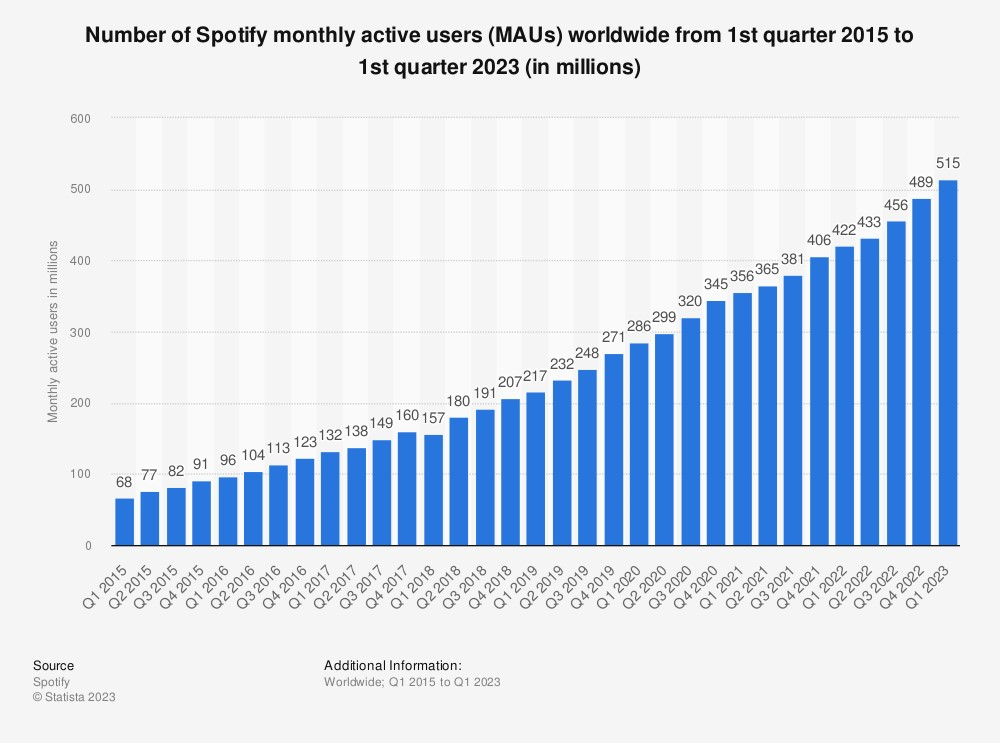

Comenzamos a trabajar con nuestros datos, para los cuales contamos con una muestra que contempla 5mil registros por cada genero. Esto nos permite tener una distribución normal para nuestras pruebas.

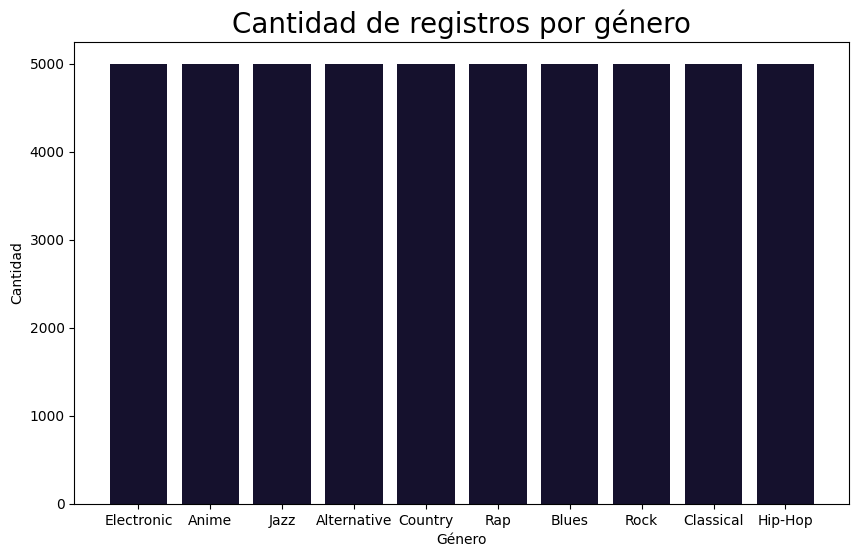

In [ ]:
cantidad_genero = df.music_genre.value_counts()
fig, ax = plt.subplots(figsize = (10,6))
ax.bar(cantidad_genero.index, cantidad_genero.values, color = '#15112D')
ax.set_title("Cantidad de registros por género",size = 20)
ax.set_xlabel("Género")
ax.set_ylabel("Cantidad")
fig.show()

Analizamos y limpiamos los datos usando diferentes librerias como pandas, matplolib y seaborn para llegar a algunas conclusiones:

* La duracion y la istumentalidad parecen ser indicativas de géneros de música específicos, como *electrónica* y *clásica*.

* Los **artistas** no están puntualmente asociados a un género concreto.

* El dataset contiene más artistas de música en los géneros de *rock, alternativo y jazz*.


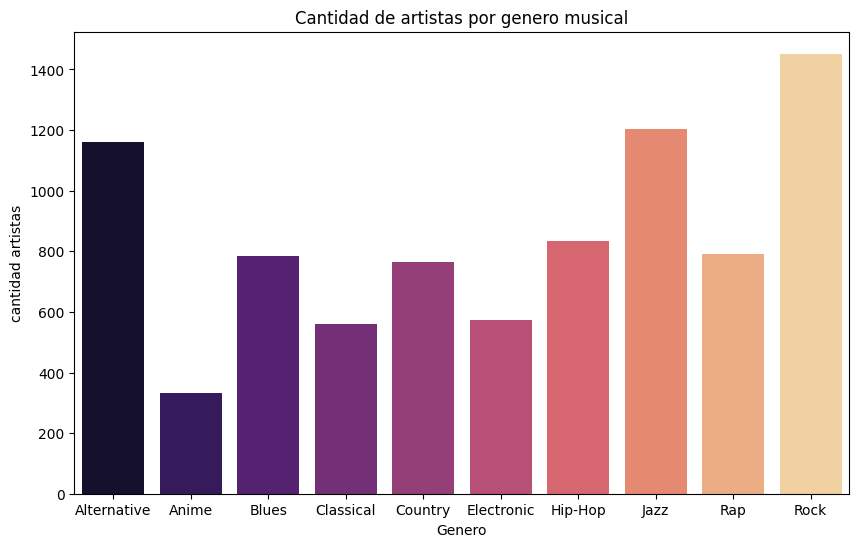

In [ ]:
artist_genre_counts = df.groupby('music_genre')['artist_name'].nunique()

plt.figure(figsize=(10, 6))
sns.barplot(x=artist_genre_counts.index, y=artist_genre_counts.values, palette = 'magma')
plt.xlabel('Genero')
plt.ylabel('cantidad artistas')
plt.title('Cantidad de artistas por genero musical')
plt.show()

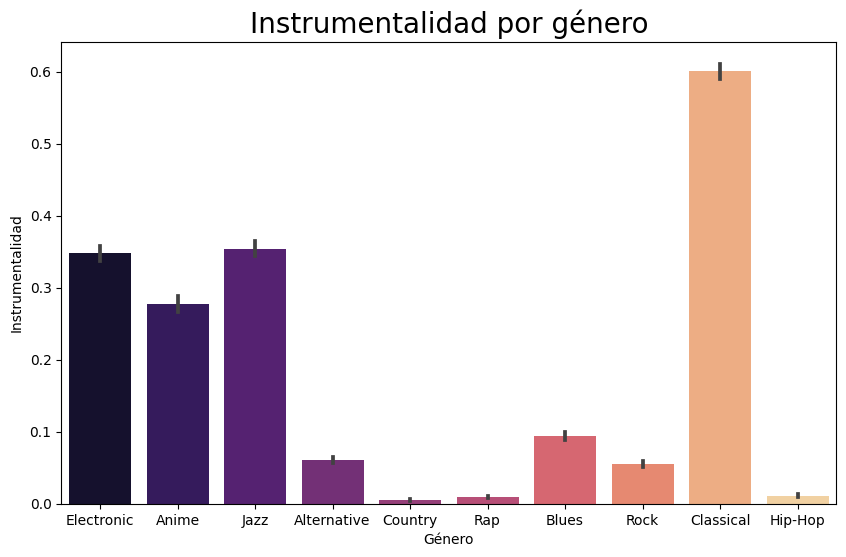

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(data = df, x='music_genre',y= 'instrumentalness', ax = ax, palette = "magma")
ax.set_title("Instrumentalidad por género",size = 20)
ax.set_xlabel("Género")
ax.set_ylabel("Instrumentalidad")
fig.show()

Hemos probado 3 modelos de clasificación para este caso:

* Random Forest
* Decision Tree
* SVM

Luego de seleccionar las variables con feature selection hemos obtenido un accuracy de 55% con **Random Forest**.

Sin embargo, su accuracy sigue estando por debajo del 60%, lo que podría indicar un caso de **underfitting**.

Con estos resultados, entendemos que es importante seguir explorando y ajustando el modelo para obtener mejores resultados, considerando diferentes algoritmos y mejorando la selección de características para lograr una clasificación más precisa.